In [1]:
import numpy as np
import matplotlib.pyplot as plt

def predict(x, m, b):
    return m * x + b

def compute_error(y_true, y_pred):
    return y_true - y_pred

def compute_cost(error):
    return np.mean(error**2)

def compute_gradients(x, error):
    n = len(x)
    dm = (-2 / n) * np.sum(x * error)
    db = (-2 / n) * np.sum(error)
    return dm, db

def update_parameters(m, b, dm, db, alpha):
    m -= alpha * dm
    b -= alpha * db
    return m, b


In [2]:
def run_gradient_descent(x, y, m_init, b_init, alpha, iterations):
    m, b = m_init, b_init
    m_values, b_values, cost_values = [], [], []

    for i in range(iterations):
        y_pred = predict(x, m, b)
        error = compute_error(y, y_pred)
        cost = compute_cost(error)
        dm, db = compute_gradients(x, error)

        m_values.append(m)
        b_values.append(b)
        cost_values.append(cost)

        print(f"Iteration {i+1}")
        print(f"Predictions: {y_pred}")
        print(f"Errors: {error}")
        print(f"Cost: {cost:.4f}")
        print(f"dm: {dm:.4f}, db: {db:.4f}")

        m, b = update_parameters(m, b, dm, db, alpha)

        print(f"Updated m: {m:.4f}, Updated b: {b:.4f}\n")

    return m, b, m_values, b_values, cost_values


In [3]:
def plot_results(m_values, b_values, cost_values):
    iterations = len(m_values)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(range(1, iterations+1), m_values, label="m (slope)", marker='o')
    plt.plot(range(1, iterations+1), b_values, label="b (intercept)", marker='s')
    plt.title("Change of m and b over iterations")
    plt.xlabel("Iteration")
    plt.ylabel("Value")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(1, iterations+1), cost_values, label="Cost (MSE)", color='red', marker='^')
    plt.title("Error (Cost) over iterations")
    plt.xlabel("Iteration")
    plt.ylabel("Cost")
    plt.legend()

    plt.tight_layout()
    plt.show()


Iteration 1
Predictions: [ 0 -2]
Errors: [3 8]
Cost: 36.5000
dm: -27.0000, db: -11.0000
Updated m: 1.7000, Updated b: 2.1000

Iteration 2
Predictions: [3.8 7.2]
Errors: [-0.8 -1.2]
Cost: 1.0400
dm: 4.4000, db: 2.0000
Updated m: 1.2600, Updated b: 1.9000

Iteration 3
Predictions: [3.16 5.68]
Errors: [-0.16  0.32]
Cost: 0.0640
dm: -0.8000, db: -0.1600
Updated m: 1.3400, Updated b: 1.9160

Final m: 1.3400, Final b: 1.9160
Final predictions: [3.256 5.936]


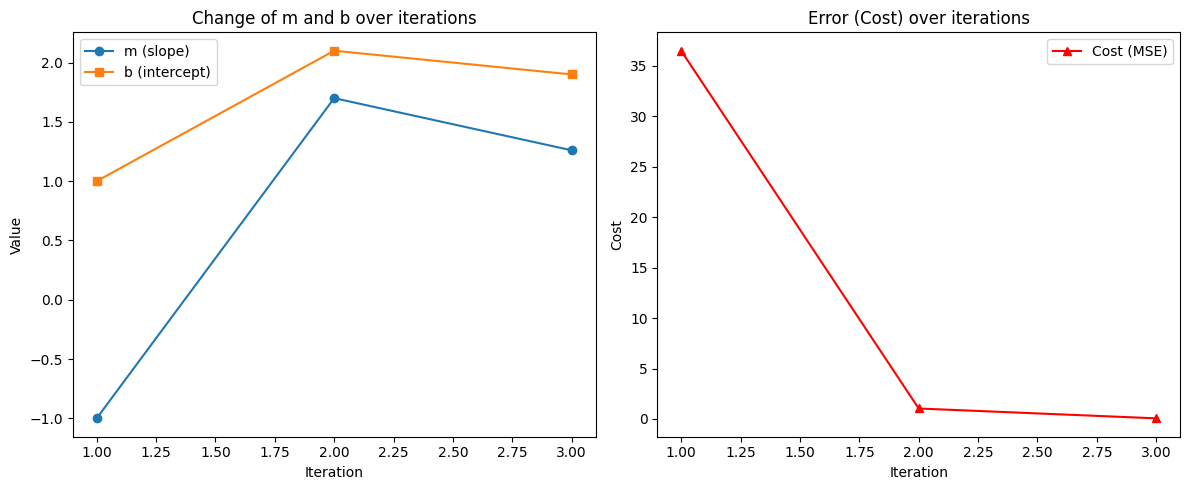

In [4]:
x = np.array([1, 3])
y = np.array([3, 6])

initial_m = -1
initial_b = 1
alpha = 0.1
iterations = 3

final_m, final_b, m_vals, b_vals, cost_vals = run_gradient_descent(
    x, y, initial_m, initial_b, alpha, iterations
)

print(f"Final m: {final_m:.4f}, Final b: {final_b:.4f}")
print("Final predictions:", predict(x, final_m, final_b))

plot_results(m_vals, b_vals, cost_vals)
